#### imports 

In [1]:
import pandas as pd
import json
import seaborn as sns
from scipy import stats
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'

In [2]:
def load_json(filename):
    data = []
    with open(filename, 'r') as f:
        for r in f.readlines():
            r_json = json.loads(r)
            if r_json['row'][4]['buyer']=='0x0000000000000000000000000000000000000000':
                continue
            else:
                data.append(r_json)
    print("amount of data %i"  % len(data))
    return data

In [3]:
# For making CDFs and CCDFs

def cdf(listlike, normalised=True):
    data = np.array(listlike)
    N = len(listlike)

    x = np.sort(data)
    if (normalised):
        y = np.arange(N)/float(N-1)
    else:
        y = np.arange(N)
    return x, y

def ccdf(listlike, normalised=True):
    x, y = cdf(listlike,normalised)
    if normalised:
        return x, 1.0-y
    else:
        return x, len(listlike)-y

In [ ]:
original_df = pd.read_csv("/tmp/Data_API_clean_nfts_ETH_only.csv")

In [ ]:
t = max(original_df['Datetime_updated_seconds'])
time.mktime(time.strptime(t, '%Y-%m-%d %H:%M:%S'))

### Read data

In [5]:
data = load_json('/tmp/results_nft_cycles.json')

amount of data 16673


In [6]:
data_df = pd.DataFrame(data)
display(data_df.iloc[20]["row"][4]['cycle']['sales'])

[{'buyer': '0x6a47b60c377450a460d3eb828d534ee66eead668',
  'price_usd': 46.584005,
  'time': 1560799003,
  'tx_hash': '0x7616fef86fa64847313027c4fd8fcac4fbae4a6e9aa365c6e1ca7b298eb25953',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a',
  'price_usd': 46.584005,
  'time': 1560813429,
  'tx_hash': '0x2a43025b03149efa2552fef430ee039ed7b4e420cf4b99bf9e0a28226b4ec5bd',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c',
  'price_usd': 44.75542500000001,
  'time': 1560827531,
  'tx_hash': '0x255bf04be9f794f5e5820774f1bcce8eb83ab9f0af51697a2261f87e38da039b',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0',
  'price_usd': 44.75542500000001,
  'time': 1560841956,
  'tx_hash': '0x12d8db7c840025019b2819a6bed59f1ae2d2b7fe715d683ed87aa858a5c9c4ee',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04',
  'price_usd': 44.75542500000001,
  'time': 156

In [61]:
data_df["profit"]=data_df["row"].apply(lambda x: x[4]['profit_usd'])

In [21]:
data_df["min_ts"] = data_df["row"].apply(lambda x: min(map(lambda y: y["time"],x[4]['cycle']['sales'])))

In [22]:
data_df["max_ts"] = data_df["row"].apply(lambda x: max(map(lambda y: y["time"],x[4]['cycle']['sales'])))

In [24]:
data_df["length"] = data_df["row"].apply(lambda x: len(x[4]['cycle']['sales']))

In [25]:
data_df["duration_days"] = (data_df["max_ts"] - data_df["min_ts"])/86400

In [62]:
display(data_df)

,timestamp,window,row,min_ts,max_ts,length,duration_days,profit
0,1619562578,None,"[60259_Rari, Rari, Art, 2, {'buyer': '0xfc233a...",1609577631,1610247255,2,7.750278,3747.449500
1,1619562578,None,"[60259_Rari, Rari, Art, 2, {'buyer': '0xfc233a...",1608425450,1609033299,2,7.035289,18.099500
2,1619562578,None,"[60259_Rari, Rari, Art, 2, {'buyer': '0xfc233a...",1607718374,1608425450,2,8.183750,828.065000
3,1619562578,None,[557720982044760014422846897256062512766055887...,1614352229,1617500507,3,36.438403,28.137960
4,1619562578,None,"[633479_Cryptokittie, Cryptokittie, Art, 4, {'...",1521531679,1521614131,4,0.954306,3.522571
...,...,...,...,...,...,...,...,...
16668,1619562578,None,"[72491_Rari, Rari, Art, 5, {'buyer': '0x3c1ce6...",1604682716,1604682888,5,0.001991,69.890400
16669,1619562578,None,"[569997_Cryptokittie, Cryptokittie, Art, 2, {'...",1520013937,1521092896,2,12.487951,0.000229
16670,1619562578,None,"[26111_Rari, Rari, Art, 3, {'buyer': '0x830f79...",1604605155,1604653389,3,0.558264,1.914630
16671,1619562578,None,"[11108_Rari, Rari, Art, 8, {'buyer': '0x4c8e27...",1600302704,1602109731,8,20.914664,196.705605


## Cycle length distributions

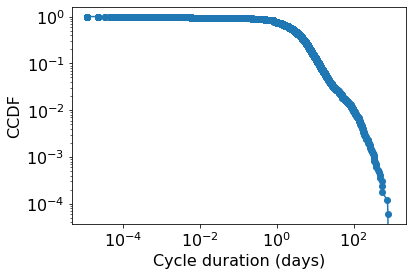

In [39]:
x,y = ccdf(data_df.duration_days)

fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(x,y, marker="o")
ax.set_ylabel("CCDF")
ax.set_xlabel("Cycle duration (days)")

plt.show()

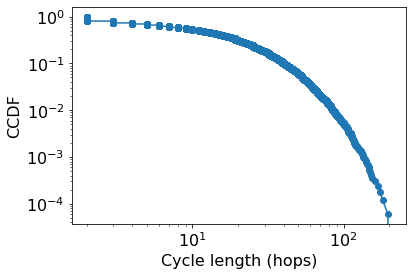

In [40]:
x,y = ccdf(data_df.length)

fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(x,y, marker="o")
ax.set_ylabel("CCDF")
ax.set_xlabel("Cycle length (hops)")

plt.show()

[7.56712963e-03 9.91689815e-01 2.91678241e+00 6.11468750e+00
 2.00502199e+01]


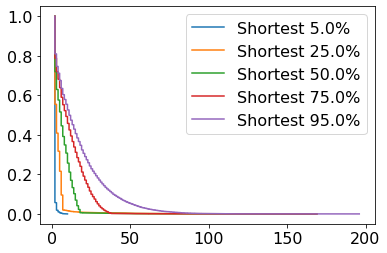

In [52]:
quantiles_of_interest = [0.05,0.25,0.50,0.75,0.95]
duration_quantiles = np.quantile(data_df.duration_days, q=quantiles_of_interest)
print(duration_quantiles)

fig, ax = plt.subplots()

for i,q in enumerate(duration_quantiles):
    x,y = ccdf(data_df[data_df.duration_days<q].length)
    ax.plot(x,y,label="Shortest "+str(quantiles_of_interest[i]*100)+"%")

ax.legend(loc="upper right")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


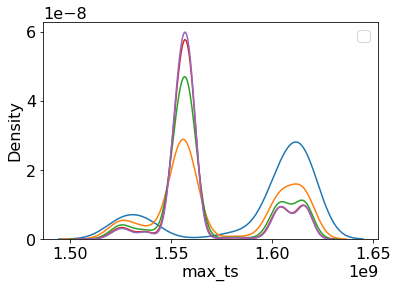

In [58]:
fig, ax = plt.subplots()
for i,q in enumerate(duration_quantiles):
    sns.kdeplot(data_df[data_df.duration_days<q].max_ts,ax=ax)

ax.legend(loc="upper right")
plt.show()

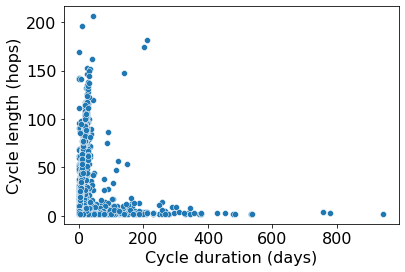

In [73]:
ax = sns.scatterplot(data=data_df, x="duration_days", y="length")
ax.set_xlabel("Cycle duration (days)")
ax.set_ylabel("Cycle length (hops)")
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.show()

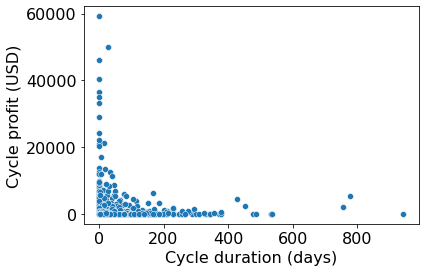

In [75]:
ax = sns.scatterplot(data=data_df, x="duration_days", y="profit")
ax.set_xlabel("Cycle duration (days)")
ax.set_ylabel("Cycle profit (USD)")
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.show()

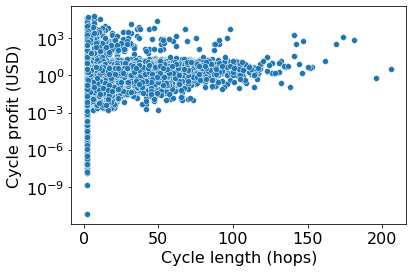

In [70]:
ax = sns.scatterplot(data=data_df, x="length", y="profit")
ax.set_xlabel("Cycle length (hops)")
ax.set_ylabel("Cycle profit (USD)")
# ax.set_xscale("log")
# ax.set_yscale("log")
plt.show()

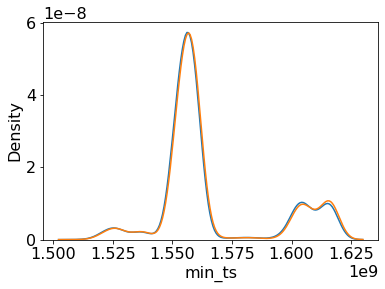

In [32]:
fig, ax = plt.subplots()
ax = sns.kdeplot(data_df.min_ts)
ax = sns.kdeplot(data_df.max_ts)

In [14]:
longest_data = max(data, key=lambda row: len(row["row"][4]['cycle']['sales']))
print("size of chain")
len(longest_data['row'][4]['cycle']['sales'])

size of chain


206

1619562578


In [9]:
from collections import Counter
Counter([sale['buyer'] for sale in longest_data['row'][4]['cycle']['sales']])

Counter({'0xe738725cdcc41c91f734dd7b5b9659df994d6dda': 2,
         '0xbabda06088c242fb2a763aa7cc99706cb77ba735': 9,
         '0x463215edb66fb6a8f0c979e739a731977617699f': 7,
         '0x8acc1421ec98689461ff5777de8ad6648dc6d643': 15,
         '0x7316e9cf94bef40d4981d66a5c41c38b6b32454c': 11,
         '0xf5aee6d7b838d5ede8aa65d31dbc11116545180c': 16,
         '0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee': 16,
         '0x6a47b60c377450a460d3eb828d534ee66eead668': 14,
         '0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28': 12,
         '0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a': 15,
         '0x87b77fabfeb869150b8e1b9462603f9a639c5fae': 15,
         '0xa21e0974137bf8400eb7dca606d9dcb190d79ed9': 12,
         '0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8': 13,
         '0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c': 5,
         '0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62': 6,
         '0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8': 9,
         '0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04': 10,
   

In [10]:
longest_data['row'][4]['cycle']['sales'][-1]['time'], longest_data['row'][4]['cycle']['sales'][0]['time'], (longest_data['row'][4]['cycle']['sales'][-1]['time']-longest_data['row'][4]['cycle']['sales'][0]['time'])/60

(1554691950, 1550901539, 63173.51666666667)

Not suspicious?

#### Most profitable NFT cycles

In [11]:
profitable_trades = np.array([x['row'][4]['profit_usd'] for x in data])

In [12]:
print("Max profit %s" % profitable_trades.max())
print("Min profit %s" % profitable_trades.min())

Max profit 59220.018
Min profit 6.697753462958644e-12


#### frequency of profits

highly skewed

In [13]:
profits = [trade['row'][4]['profit_usd'] for trade in data]

In [14]:
np.std(profits), min(profits), max(profits), len(profits)

(1141.993050903458, 6.697753462958644e-12, 59220.018, 16673)

In [15]:
np.mean(profits), stats.trim_mean(profits, 0.05), stats.trim_mean(profits, 0.10), stats.trim_mean(profits, 0.25)

(118.17145378028405, 14.269678921028847, 5.234855907639334, 2.031706742531798)

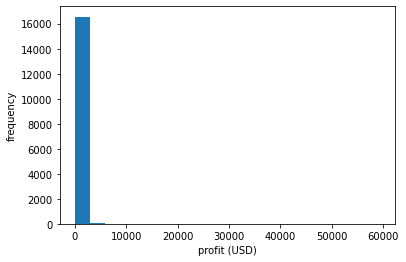

In [16]:
plt.hist(profits, bins=20)
plt.xlabel("profit (USD)")
plt.ylabel("frequency")
plt.savefig("frequency_profits.png")

In [17]:
# trim top and bottom 5%
trimmed_profits = stats.trimboth(profits, 0.05)

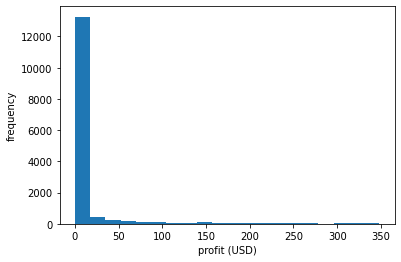

In [20]:
plt.hist(trimmed_profits, bins=20)
plt.xlabel("profit (USD)")
plt.ylabel("frequency")
plt.savefig("/tmp/frequency_profits_trimmed.png")

#### how much of the nfts appreciated the most in the cycle

In [21]:
print("min %.4f, max %.4f, amt %i" % (min(profits), max(profits), len(profits)))
value = 80 # USD
(len([_ for _ in profits if _ <= value])/len(profits)) * 100

min 0.0000, max 59220.0180, amt 16673


90.04378336232232

In [ ]:
# sns_plot.figure.savefig("output.png")

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


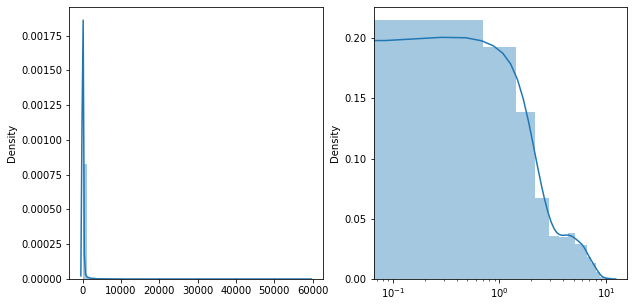

In [22]:
# the histogram of the data

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.distplot(profitable_trades, ax=ax[0])
sns.distplot(np.log(profitable_trades), ax=ax[1])
ax[1].set_xscale("log")
plt.show()

# Highest Cost Cycles

Top 5 NFTs that appreciated the most

In [23]:
trade

NameError: name 'trade' is not defined

In [25]:
def pretty_cycle(cycle):
    as_string = '   '
    prev_price = cycle[0]['price_usd']
    prev_time = cycle[0]['time']
    for item in cycle:
        diff = item['price_usd']-prev_price
        time_secs = item['time']-prev_time
        time_mins = time_secs/60
        time_hours = time_secs/60/60
        time_days = time_secs/60/60/24 
        prev_time = item['time']
        time_str = '%.1fm/%.1fh/%.2fd' % (time_mins, time_hours, time_days)
        as_string += 'T(d) '+time_str+', B: '+item['buyer'][:4]+'.. $'+str(item['price_usd'])+'('+str(diff)+') '+item['tx_hash']+'\n->'
    as_string = as_string[:-3]
    print(as_string)
# pretty_cycle(all_profits_sorted[0]['cycle'])

In [26]:
profits = [trade['row'][4]['profit_usd'] for trade in data]
all_profits_sorted = []
for trade in data:
    new_trade = {
        'profit_usd': trade['row'][4]['profit_usd'],
        'buyer':  trade['row'][4]['buyer'],
        'cycle_size': trade['row'][3],
        'nft_id': trade['row'][0],
        'cycle': trade['row'][4]['cycle']['sales']
    }
    all_profits_sorted.append(new_trade)
all_profits_sorted = sorted(all_profits_sorted, key=lambda d: d['profit_usd'], reverse=True)

In [27]:
all_profits_sorted[0]

{'profit_usd': 59220.018,
 'buyer': '0x879c2ee5adc372d0542d65d80ebfe647ac1a5f10',
 'cycle_size': 7,
 'nft_id': '6929_Rari',
 'cycle': [{'buyer': '0x879c2ee5adc372d0542d65d80ebfe647ac1a5f10',
   'price_usd': 56942.325,
   'time': 1599679592,
   'tx_hash': '0x8530cee364e3aa98c5c1c4cef849dbe0780dfdb8d9a9b4674d22837028312084',
   'nft_id': '6929_Rari'},
  {'buyer': '0x896b94f4f27f12369698c302e2049cae86936bbb',
   'price_usd': 1138.8465000000006,
   'time': 1599680220,
   'tx_hash': '0xb805851908065988cb9c1747c8693e396d22432024e951b5133be7ff5ea8053a',
   'nft_id': '6929_Rari'},
  {'buyer': '0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea',
   'price_usd': 4555.386000000001,
   'time': 1599681810,
   'tx_hash': '0x5cd83126cc066245a1da552c7f6f97f0537ac8d705838d1010f74432cdd8c6fd',
   'nft_id': '6929_Rari'},
  {'buyer': '0x490697b59520cfa81938df18b4634081556d3d15',
   'price_usd': 113.88465,
   'time': 1599682010,
   'tx_hash': '0xa2de576299276233ce73cc62494f93150c0efbda23ffaf9be80a5e75ba88a378',
 

In [28]:
for trade in all_profits_sorted[:5]:
    print("B: %s, PROFIT %.3f, HOPS %i" % (trade['buyer'][:5],trade['profit_usd'], trade['cycle_size']))
    pretty_cycle(trade['cycle'])
    print()

B: 0x879, PROFIT 59220.018, HOPS 7
   T(d) 0.0m/0.0h/0.00d, B: 0x87.. $56942.325(0.0) 0x8530cee364e3aa98c5c1c4cef849dbe0780dfdb8d9a9b4674d22837028312084
->T(d) 10.5m/0.2h/0.01d, B: 0x89.. $1138.8465000000006(-55803.4785) 0xb805851908065988cb9c1747c8693e396d22432024e951b5133be7ff5ea8053a
->T(d) 26.5m/0.4h/0.02d, B: 0x93.. $4555.386000000001(-52386.939) 0x5cd83126cc066245a1da552c7f6f97f0537ac8d705838d1010f74432cdd8c6fd
->T(d) 3.3m/0.1h/0.00d, B: 0x49.. $113.88465(-56828.44035) 0xa2de576299276233ce73cc62494f93150c0efbda23ffaf9be80a5e75ba88a378
->T(d) 7.2m/0.1h/0.01d, B: 0xd3.. $113.88465(-56828.44035) 0x14f8867198a82fb96bc63a4eff8dcce46d49a17ef92200b2bf89d17d2a9dfb92
->T(d) 0.0m/0.0h/0.00d, B: 0x42.. $341.65395(-56600.67105) 0x2f6ef591fb1a2da6a8a27edc56b088ab9104aa77063099cfb72d82e67125eb99
->T(d) 10.4m/0.2h/0.01d, B: 0x87.. $116162.343(59220.018) 0x6401d73024c774a98789d7745fd7e70eeb8b43f86ede0d64438409e83023e5eb

B: 0xb16, PROFIT 49936.400, HOPS 3
   T(d) 0.0m/0.0h/0.00d, B: 0xb1.. $4751

### Delete all rari token cycles

In [29]:
all_profits_sorted_no_rari = []
for trade in data:
    if '_Rari' in trade['row'][0] or trade['row'][3] <= 2:
        continue
    new_trade = {
        'profit_usd': trade['row'][4]['profit_usd'],
        'buyer':  trade['row'][4]['buyer'],
        'cycle_size': trade['row'][3],
        'nft_id': trade['row'][0],
        'cycle': trade['row'][4]['cycle']['sales']
    }
    all_profits_sorted_no_rari.append(new_trade)
all_profits_sorted_no_rari = sorted(all_profits_sorted_no_rari, key=lambda d: d['profit_usd'], reverse=True)

In [30]:
for trade in all_profits_sorted_no_rari[:5]:
    print("B: %s, PROFIT %.3f, HOPS %i" % (trade['buyer'][:5],trade['profit_usd'], trade['cycle_size']))
    pretty_cycle(trade['cycle'])
    print()

B: 0xb16, PROFIT 49936.400, HOPS 3
   T(d) 0.0m/0.0h/0.00d, B: 0xb1.. $47512.0(0.0) 0x5f070ac611b997e4a87696ce962cbfd6798eb600c941895e0488273c69aea5b9
->T(d) 32128.7m/535.5h/22.31d, B: 0x8e.. $80190.9(32678.899999999994) 0x905ed48693a03d5258546e97b4485daa44c7d789ee493d91b67e6e80e049ea0c
->T(d) 8561.3m/142.7h/5.95d, B: 0xb1.. $97448.4(49936.399999999994) 0x3c9d576d6a16b0c8705765eca1f2abdbb184e63bd815d656d6724a35786d367e

B: 0xef7, PROFIT 12606.265, HOPS 3
   T(d) 0.0m/0.0h/0.00d, B: 0xef.. $51233.07499999999(0.0) 0x3d9f15234fe1348ff17d1f8118e6405c8ae1b2c0c87e25a588e95f68c3ff498e
->T(d) 48071.5m/801.2h/33.38d, B: 0x00.. $47406.62100000001(-3826.4539999999834) 0x69f1eea5568cfd217d8e3d6c7ae601e34c9af905feb6249ac510741b62f0a3c4
->T(d) 12.9m/0.2h/0.01d, B: 0xef.. $63839.34(12606.265000000007) 0x941a42df26a585af6aafa0720ea315213333c15f9ab6ae72947e047fd03ed0de

B: 0x107, PROFIT 11245.599, HOPS 3
   T(d) 0.0m/0.0h/0.00d, B: 0x10.. $5122.584299999999(0.0) 0xeda7207b6d1ced6e3eb34cecd07ccb0129cebf

## Traders that made the most on average per cycle

In [31]:
all_profits_sorted_no_rari[0]

{'profit_usd': 49936.399999999994,
 'buyer': '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd',
 'cycle_size': 3,
 'nft_id': '8033_Cryptopunk',
 'cycle': [{'buyer': '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd',
   'price_usd': 47512.0,
   'time': 1613663309,
   'tx_hash': '0x5f070ac611b997e4a87696ce962cbfd6798eb600c941895e0488273c69aea5b9',
   'nft_id': '8033_Cryptopunk'},
  {'buyer': '0x8ee483a4c53eb4b1da23da5448c884f6e7a09dbb',
   'price_usd': 80190.9,
   'time': 1615591029,
   'tx_hash': '0x905ed48693a03d5258546e97b4485daa44c7d789ee493d91b67e6e80e049ea0c',
   'nft_id': '8033_Cryptopunk'},
  {'buyer': '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd',
   'price_usd': 97448.4,
   'time': 1616104709,
   'tx_hash': '0x3c9d576d6a16b0c8705765eca1f2abdbb184e63bd815d656d6724a35786d367e',
   'nft_id': '8033_Cryptopunk'}]}

In [32]:
traders_avg

NameError: name 'traders_avg' is not defined

In [33]:
traders_profit = {}
# load data
for trade in all_profits_sorted_no_rari:
    trader = trade['buyer']
    profit = trade['profit_usd']
    if trader not in traders_profit:
        traders_profit[trader] = []
    traders_profit[trader].append(profit)
# calc average
traders_avg = {}
for trader, _profit in traders_profit.items():
    avg = sum(_profit)/len(_profit)
    traders_avg[trader] = {
        'avg': avg, 
        'count': len(_profit),
        'total_profit': sum(_profit)
    }
# sort
traders_avg_sorted = sorted(traders_avg, key=lambda x: traders_avg[x]['avg'], reverse=True)

In [34]:
for t in traders_avg_sorted[:10]:
    print(t)
    print(traders_avg[t])
    print()

0xb166dd9d114c59774a13c3291e7d50ec74f23dfd
{'avg': 49936.399999999994, 'count': 1, 'total_profit': 49936.399999999994}

0xef784caf2d2001fb8fbb9678f9a0a1b83cd582dc
{'avg': 12606.265000000007, 'count': 1, 'total_profit': 12606.265000000007}

0x10725af1f2919d0acc5cf294285d97710f980490
{'avg': 11245.5986, 'count': 1, 'total_profit': 11245.5986}

0x08ceb8bba685ee708c9c4c65576837cbe19b9dea
{'avg': 5544.701499999998, 'count': 1, 'total_profit': 5544.701499999998}

0xb4d0e809a1903143c17e213abe9202fb436b2513
{'avg': 5276.670249999999, 'count': 1, 'total_profit': 5276.670249999999}

0x71bd9f709dd252db7f5226bc895fdcd16905394a
{'avg': 4974.266305000001, 'count': 1, 'total_profit': 4974.266305000001}

0xff1e28b303c7eab54bcbd98cd0dc921b3f4b853e
{'avg': 4790.793750000002, 'count': 1, 'total_profit': 4790.793750000002}

0xc4e261aae8652d48ea572808b491e96f96d11dba
{'avg': 4710.8982685, 'count': 1, 'total_profit': 4710.8982685}

0x62391b370a4761f7087f83d9d2c8d7bfa91036ab
{'avg': 4324.6448, 'count': 1, 't

okay this is pretty bad, how about instead i check how many traders did more than 1 cycle?

### How many traders did how many cycles?

In [35]:
from collections import Counter
traders_cycle_count = Counter([x['count'] for x in traders_avg.values()])
traders_cycle_count = sorted(traders_cycle_count.items())
total_cycles = sum([x['count'] for x in traders_avg.values()])
print('total_cycles ', total_cycles)
print('traders ', len(traders_avg))
cum_sum_traders = 0
for cycle_size,traders in traders_cycle_count:
    cum_sum_traders += traders
    print('traders under %i cycle - %i, %i %.2fp' % (cycle_size, traders, cum_sum_traders, cum_sum_traders/len(traders_avg)*100))

total_cycles  12176
traders  352
traders under 1 cycle - 249, 249 70.74p
traders under 2 cycle - 50, 299 84.94p
traders under 3 cycle - 17, 316 89.77p
traders under 4 cycle - 6, 322 91.48p
traders under 5 cycle - 4, 326 92.61p
traders under 6 cycle - 2, 328 93.18p
traders under 7 cycle - 1, 329 93.47p
traders under 9 cycle - 1, 330 93.75p
traders under 10 cycle - 1, 331 94.03p
traders under 14 cycle - 1, 332 94.32p
traders under 528 cycle - 1, 333 94.60p
traders under 531 cycle - 1, 334 94.89p
traders under 548 cycle - 1, 335 95.17p
traders under 552 cycle - 1, 336 95.45p
traders under 567 cycle - 1, 337 95.74p
traders under 570 cycle - 1, 338 96.02p
traders under 573 cycle - 1, 339 96.31p
traders under 575 cycle - 1, 340 96.59p
traders under 580 cycle - 1, 341 96.88p
traders under 589 cycle - 1, 342 97.16p
traders under 597 cycle - 2, 344 97.73p
traders under 598 cycle - 1, 345 98.01p
traders under 604 cycle - 2, 347 98.58p
traders under 608 cycle - 1, 348 98.86p
traders under 612 cyc

In [36]:
traders_count_sorted = sorted(traders_avg, key=lambda x: traders_avg[x]['count'], reverse=True)

In [37]:
for t in traders_count_sorted[:50]:
    print(t)
    print(traders_avg[t])
    print()

0x8acc1421ec98689461ff5777de8ad6648dc6d643
{'avg': 2.2519553917404505, 'count': 617, 'total_profit': 1389.456476703858}

0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8
{'avg': 2.19609054383117, 'count': 616, 'total_profit': 1352.7917750000008}

0xa21e0974137bf8400eb7dca606d9dcb190d79ed9
{'avg': 2.3006426628664522, 'count': 614, 'total_profit': 1412.5945950000016}

0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee
{'avg': 2.3572472385620915, 'count': 612, 'total_profit': 1442.6353100000001}

0x1c1ef71445010114f41ac1feb32dbf5d7281e90f
{'avg': 2.3474603371710523, 'count': 608, 'total_profit': 1427.2558849999998}

0x6a47b60c377450a460d3eb828d534ee66eead668
{'avg': 2.2968711341059636, 'count': 604, 'total_profit': 1387.310165000002}

0xe738725cdcc41c91f734dd7b5b9659df994d6dda
{'avg': 2.2413728476821193, 'count': 604, 'total_profit': 1353.7892000000002}

0x463215edb66fb6a8f0c979e739a731977617699f
{'avg': 2.170596011705686, 'count': 598, 'total_profit': 1298.0164150000003}

0x179d698f5a1c84c3ff4c5eb04e5

# Lets take a look at the trader who did the most cycles

In [38]:
big_boy_trader = '0x8acc1421ec98689461ff5777de8ad6648dc6d643'

In [39]:
big_boy = []
for trade in data:
    if '_Rari' in trade['row'][0] or trade['row'][3] <= 2:
        continue
    if trade['row'][4]['buyer'] == big_boy_trader:
        big_boy.append(trade)

In [40]:
big_boy[25]

{'timestamp': 1619562578,
 'window': None,
 'row': ['965763_Cryptokittie',
  'Cryptokittie',
  'Art',
  17,
  {'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
   'profit_usd': 2.8115099999999913,
   'cycle': {'sales': [{'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
      'price_usd': 57.49848,
      'time': 1560138735,
      'tx_hash': '0x9b6eb9ca770ea267d6e6b8bf343a893af27bdf3396647b6981d0665958221f43',
      'nft_id': '965763_Cryptokittie'},
     {'buyer': '0x87b77fabfeb869150b8e1b9462603f9a639c5fae',
      'price_usd': 57.49848,
      'time': 1560152822,
      'tx_hash': '0xe0fb8033db0f60763e674f0e643c5bcbf89dcd1d9ca6c2105a37dc3ad63e839a',
      'nft_id': '965763_Cryptokittie'},
     {'buyer': '0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c',
      'price_usd': 57.49848,
      'time': 1560167201,
      'tx_hash': '0xc95e523bd5f5df70002acdcafb8b1dd7e2965648e4868f5af5da47f32be1e87d',
      'nft_id': '965763_Cryptokittie'},
     {'buyer': '0xcdcadf0279ee021a0c40a31ac10fa69e

In [41]:
big_boy[124]

{'timestamp': 1619562578,
 'window': None,
 'row': ['37525_Mlbchampion',
  'Mlbchampion',
  'Collectible',
  10,
  {'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
   'profit_usd': 0.6018300000000032,
   'cycle': {'sales': [{'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
      'price_usd': 21.737160000000006,
      'time': 1551809865,
      'tx_hash': '0x4a85311a64cf9812d55d8317d1ca18f9408f790030407e75e91fa01cd582fc6d',
      'nft_id': '37525_Mlbchampion'},
     {'buyer': '0xbabda06088c242fb2a763aa7cc99706cb77ba735',
      'price_usd': 21.737160000000006,
      'time': 1551823915,
      'tx_hash': '0xa147bc921941aa252170c805d2c095c09b144a552ed6a49a160581ef8e7b4653',
      'nft_id': '37525_Mlbchampion'},
     {'buyer': '0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62',
      'price_usd': 22.2912,
      'time': 1551838325,
      'tx_hash': '0x0d143e712069434b347300c2fd2a144c466f06e398e76c64ebc4926b0fe22354',
      'nft_id': '37525_Mlbchampion'},
     {'buyer': '0xcdcadf0279ee02

#### Big boy: NFTs they traded

In [42]:
from collections import Counter
most_common_nft_collection = []
most_common_nft = []
for trade in big_boy:
    nft_collection =  trade['row'][0].split('_')
    if len(nft_collection) > 2:
        print("crap")
    most_common_nft.append(trade['row'][0])
    most_common_nft_collection.append(nft_collection[1])
most_common_nft_collection = set(most_common_nft_collection)
most_common_nft_collection = Counter(most_common_nft_collection)
most_common_nft = Counter(most_common_nft)

In [43]:
most_common_nft_collection

Counter({'Mlbchampion': 1, 'Etheremon': 1, 'Cryptokittie': 1})

In [44]:
sorted(most_common_nft.items(), key=lambda x: x[1], reverse=True), len(most_common_nft)

([('43995_Etheremon', 28),
  ('965763_Cryptokittie', 26),
  ('35008_Mlbchampion', 25),
  ('1009482_Cryptokittie', 24),
  ('1016910_Cryptokittie', 24),
  ('34508_Etheremon', 23),
  ('41419_Etheremon', 23),
  ('108489_Mlbchampion', 22),
  ('882455_Cryptokittie', 22),
  ('1037945_Cryptokittie', 21),
  ('41303_Etheremon', 21),
  ('26643_Mlbchampion', 20),
  ('38623_Etheremon', 19),
  ('857510_Cryptokittie', 19),
  ('1067790_Cryptokittie', 19),
  ('128117_Mlbchampion', 19),
  ('37525_Mlbchampion', 18),
  ('995907_Cryptokittie', 18),
  ('1080953_Cryptokittie', 18),
  ('8002_Etheremon', 18),
  ('34718_Etheremon', 18),
  ('966604_Cryptokittie', 18),
  ('1043670_Cryptokittie', 17),
  ('84456_Mlbchampion', 17),
  ('853115_Cryptokittie', 16),
  ('42919_Etheremon', 16),
  ('145277_Mlbchampion', 15),
  ('28832_Etheremon', 15),
  ('1010032_Cryptokittie', 15),
  ('917284_Cryptokittie', 15),
  ('1151860_Cryptokittie', 14),
  ('945435_Cryptokittie', 14)],
 32)

#### Big boy: Wallets they often traded with?

In [45]:
wallet_interactions = []
for trade in big_boy:
    for sale in trade['row'][4]['cycle']['sales']:
        wallet_interactions.append(sale['buyer'])
wallet_interactions = Counter(wallet_interactions)

In [46]:
sorted(wallet_interactions.items(), key=lambda x: x[1], reverse=True), len(wallet_interactions)

([('0x8acc1421ec98689461ff5777de8ad6648dc6d643', 1234),
  ('0xa21e0974137bf8400eb7dca606d9dcb190d79ed9', 710),
  ('0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8', 674),
  ('0xe738725cdcc41c91f734dd7b5b9659df994d6dda', 662),
  ('0x1c1ef71445010114f41ac1feb32dbf5d7281e90f', 659),
  ('0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee', 653),
  ('0xf5aee6d7b838d5ede8aa65d31dbc11116545180c', 649),
  ('0x6a47b60c377450a460d3eb828d534ee66eead668', 649),
  ('0xbabda06088c242fb2a763aa7cc99706cb77ba735', 644),
  ('0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8', 635),
  ('0x463215edb66fb6a8f0c979e739a731977617699f', 624),
  ('0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c', 623),
  ('0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04', 618),
  ('0x87b77fabfeb869150b8e1b9462603f9a639c5fae', 612),
  ('0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28', 600),
  ('0x236ef21dc36d0aec3990dd5ee84a9d5320644262', 596),
  ('0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62', 594),
  ('0x7316e9cf94bef40d4981d66a5c41c38b6b32454c', 590),
  ('0x68d

#### Big boy: the times between each of their trades? m

In [47]:
times_between_trades = []
for trade in big_boy:
    first_time = trade['row'][4]['cycle']['sales'][0]['time']
    last_time = trade['row'][4]['cycle']['sales'][-1]['time']
    diff = (last_time - first_time)/60/60
    times_between_trades.append(diff)
times_between_trades

[90.99527777777777,
 186.09805555555556,
 217.6625,
 31.638055555555557,
 15.866388888888888,
 55.41583333333333,
 134.56194444444444,
 44.73361111111112,
 89.86777777777777,
 94.95,
 178.12972222222223,
 63.32944444444445,
 103.22166666666666,
 170.16666666666666,
 35.64361111111111,
 47.49055555555556,
 19.736944444444443,
 154.42583333333332,
 27.758888888888887,
 67.23111111111112,
 31.64638888888889,
 138.60472222222222,
 85.82222222222222,
 126.67361111111111,
 35.58305555555555,
 63.32805555555556,
 110.84194444444444,
 19.619444444444447,
 154.54833333333332,
 75.15944444444445,
 166.25916666666666,
 27.73,
 35.57194444444444,
 158.28861111111112,
 83.22472222222223,
 27.683055555555555,
 27.660277777777775,
 19.7625,
 75.13916666666667,
 142.535,
 19.737222222222222,
 189.95499999999998,
 225.58055555555558,
 63.3375,
 158.32916666666668,
 142.46,
 31.57638888888889,
 23.87,
 63.333888888888886,
 67.24472222222222,
 178.10888888888888,
 63.33083333333333,
 31.65083333333333,
 

In [51]:
pretty_cycle(big_boy[10]['row'][4]['cycle']['sales'])

   T(d) 0.0m/0.0h/0.00d, B: 0x8a.. $27.154920000000004(0.0) 0xcf9c78d0d6298cfacf16b1333c29c3e925ff27f80c6835062e3167b92e8cbd78
->T(d) 235.0m/3.9h/0.16d, B: 0xf5.. $27.154920000000004(0.0) 0x1e662233d7f3d7986054062c0a538955ed66c6e52d29f1ba2b8e4c961138255b
->T(d) 240.7m/4.0h/0.17d, B: 0x87.. $27.154920000000004(0.0) 0xa0a72d30beb89211cfbce243df96b81b070d563213ad201aa644d1db99529ad4
->T(d) 234.1m/3.9h/0.16d, B: 0x6a.. $27.154920000000004(0.0) 0x25bd70c90e9c1cb169326bb6479ebd3bc438ef1a58d8d6a822ff7d81cd85e0cb
->T(d) 239.7m/4.0h/0.17d, B: 0xa2.. $27.43884000000001(0.2839200000000055) 0xc4ecc72367add3b226833699cb22ef94f78a56eb630c2606816d34dc439e878a
->T(d) 236.8m/3.9h/0.16d, B: 0xcd.. $27.43884000000001(0.2839200000000055) 0x4b51c6b9377c8778adf60ca5f99ed9ee4d5cd41145f2d2c8e238a61043a89cc2
->T(d) 238.2m/4.0h/0.17d, B: 0xba.. $27.43884000000001(0.2839200000000055) 0x1ac4cc0424eba8113ea068e8c9eff3f9d8c07352ba43e9cd1683e52d5900a89d
->T(d) 238.8m/4.0h/0.17d, B: 0x87.. $27.43884000000001(0.283920

In [49]:
big_boy[20]['row'][4]['cycle']['sales']

[{'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
  'price_usd': 24.62837,
  'time': 1550753030,
  'tx_hash': '0x2c14a11af2efcd71ecbf6e391f423d8d82a719d12cd38a78cb6cfcb8911647e8',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0xbabda06088c242fb2a763aa7cc99706cb77ba735',
  'price_usd': 18.79917,
  'time': 1550767202,
  'tx_hash': '0x578603b33e4ab6d6402a87e9c096d0b9c6ba345caf168ae580fab88f487844c2',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0x463215edb66fb6a8f0c979e739a731977617699f',
  'price_usd': 24.62837,
  'time': 1550781761,
  'tx_hash': '0x8ca90485db647c962d65be927b7235efd06b1f50c3766cd99f8b36fa7d1cadd5',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04',
  'price_usd': 24.91567,
  'time': 1550795914,
  'tx_hash': '0x6bd619cd1568f54c2c8567fcd4d2095e4ae0d1d6825c85cdcb252e9712f6cd71',
  'nft_id': '34508_Etheremon'},
 {'buyer': '0x87b77fabfeb869150b8e1b9462603f9a639c5fae',
  'price_usd': 24.91567,
  'time': 1550809922,
  'tx_hash': '0xf5b2

okay i found something here, he basically trades each nft between wallets within a 4 hour window??

#### Big boy: how many times did were each nft involved in a transaction?

In [52]:
transactions = []
for trade in big_boy:
    _txs =  [sale['tx_hash'] for sale in trade['row'][4]['cycle']['sales']]
    transactions.extend(_txs)
len(transactions), len(set(transactions))

(13193, 12874)

#### Big boy: What was the time between each transaction?

In [53]:
import math
def time_finder(cycle):
    prev_time = cycle[0]['time']
    times = []
    for sale in cycle:
        time_secs = sale['time']-prev_time
        time_hours = time_secs/60/60
        prev_time = sale['time']
        time_hours = round(time_hours, 1)
        times.append(time_hours)
    return times

In [54]:
time_found = []
for trade in big_boy:
    time_found.extend(time_finder(trade['row'][4]['cycle']['sales']))
time_found = Counter(time_found)
print("total times : %i" % sum(time_found.values()))
between_39_41 = time_found[3.4]+time_found[3.5]+time_found[3.6] +time_found[3.7] +time_found[3.8] +time_found[3.9] +time_found[4.0] +time_found[4.1] +time_found[4.2]+time_found[4.3]+time_found[4.4]+time_found[4.5]+time_found[4.6]
print("times between 3.4 and 4.6 : %i - %.2fp" % (between_39_41, between_39_41/sum(time_found.values())*100))

total times : 13193
times between 3.4 and 4.6 : 11658 - 88.37p


In [55]:
sorted(time_found.items(), key=lambda x:x[0], reverse=True)

[(2430.6, 1),
 (554.2, 1),
 (328.6, 1),
 (320.5, 1),
 (312.7, 1),
 (277.1, 1),
 (190.5, 1),
 (185.4, 1),
 (167.0, 1),
 (162.2, 1),
 (142.4, 1),
 (130.5, 1),
 (126.7, 1),
 (126.0, 1),
 (121.2, 1),
 (114.8, 2),
 (106.9, 1),
 (103.6, 1),
 (103.0, 1),
 (99.3, 1),
 (99.0, 1),
 (98.9, 1),
 (96.8, 1),
 (95.1, 1),
 (95.0, 4),
 (93.3, 1),
 (92.8, 1),
 (92.7, 2),
 (92.5, 2),
 (79.2, 1),
 (69.7, 1),
 (67.3, 1),
 (64.9, 1),
 (64.5, 1),
 (63.4, 1),
 (63.3, 2),
 (58.7, 1),
 (55.5, 2),
 (55.4, 4),
 (53.4, 1),
 (51.5, 3),
 (51.4, 3),
 (49.6, 1),
 (47.5, 6),
 (43.6, 1),
 (39.6, 10),
 (38.7, 1),
 (36.1, 1),
 (35.9, 1),
 (35.7, 4),
 (35.6, 4),
 (35.5, 1),
 (35.4, 1),
 (35.1, 1),
 (35.0, 1),
 (34.6, 1),
 (34.5, 1),
 (34.4, 1),
 (34.3, 1),
 (33.9, 1),
 (33.6, 1),
 (31.7, 9),
 (31.1, 1),
 (31.0, 1),
 (30.1, 1),
 (29.8, 1),
 (29.5, 1),
 (27.9, 1),
 (27.8, 5),
 (27.7, 15),
 (27.6, 3),
 (27.3, 2),
 (27.2, 1),
 (27.0, 2),
 (26.7, 1),
 (26.6, 1),
 (26.4, 1),
 (26.1, 1),
 (25.1, 1),
 (24.2, 1),
 (23.9, 1),
 (23.8

In [56]:
trade['row'][4]['cycle']

{'sales': [{'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
   'price_usd': 17.679150000000003,
   'time': 1549545195,
   'tx_hash': '0xf5da5dfc2c0bffecc3a588fd1921572dbd7b3cf809624e890f1828c83d0af83b',
   'nft_id': '41303_Etheremon'},
  {'buyer': '0x463215edb66fb6a8f0c979e739a731977617699f',
   'price_usd': 17.679150000000003,
   'time': 1549559611,
   'tx_hash': '0x570c345f9c1f23c31f6bc11dd535e9e5e9bc47036cc7c6684f433ab1f432c210',
   'nft_id': '41303_Etheremon'},
  {'buyer': '0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a',
   'price_usd': 20.56405,
   'time': 1549893534,
   'tx_hash': '0xdfe909bef90fde2106d6901cc807b00230425fb3e4abc7c49dd0ccbd2eeb8b33',
   'nft_id': '41303_Etheremon'},
  {'buyer': '0xa21e0974137bf8400eb7dca606d9dcb190d79ed9',
   'price_usd': 20.56405,
   'time': 1549907899,
   'tx_hash': '0x9eed65758324a59107cd8d29b201c0d6ff2dd4e96e431ccb4e6fadca3332b517',
   'nft_id': '41303_Etheremon'},
  {'buyer': '0x8acc1421ec98689461ff5777de8ad6648dc6d643',
   'price_usd': 2

#### Whale as a graph in gephi

##### Whale as bipartide between nfts

In [57]:
import networkx as nx
G = nx.MultiGraph()
wallets = set([])
for cycle in big_boy:
    for trade in cycle['row'][4]['cycle']['sales']:
        from_ = trade['buyer']
        to_ = trade['nft_id']
        if from_ not in G.nodes:
            wallets.add(from_)
            G.add_node(from_, node_type='wallet')
        if to_ not in G.nodes:
            G.add_node(to_, node_type='nft')
        G.add_edge(from_, to_)
print(G.number_of_nodes(), G.number_of_edges())

52 13193


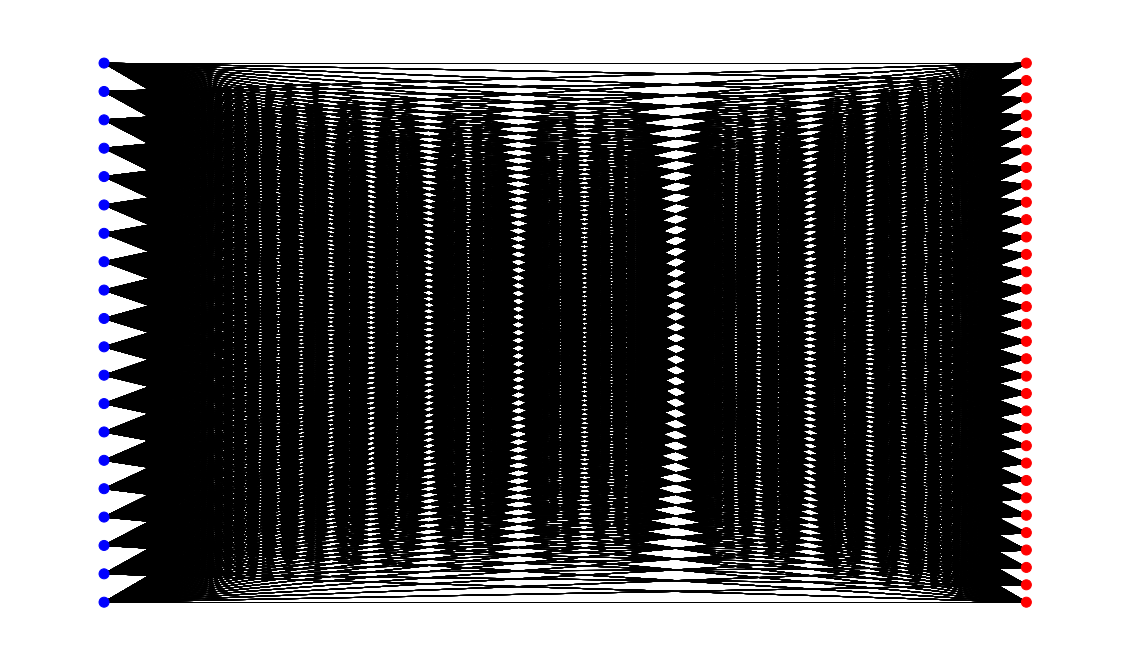

In [58]:
pos = nx.bipartite_layout(G, nodes=wallets)
color_map = {'nft': 'red', 'wallet': 'blue'}
plt.figure(figsize=(20, 12))
nx.draw_networkx(G, \
                 pos, \
                 node_size = 100, \
                 node_color=[color_map[node[1]['node_type']] for node in G.nodes(data=True)], \
                 alpha = 1, \
                 with_labels=False)
plt.axis('off')
plt.savefig('Whale_bipartide_node_to_nfts.png')

##### Whale between their wallets

In [59]:
import networkx as nx
G = nx.DiGraph()
wallets = set([])
for cycle in big_boy:
    prev_buyer = ''
    for trade in cycle['row'][4]['cycle']['sales']:
        to_ = trade['buyer']
        from_ = prev_buyer
        if prev_buyer == '':
            prev_buyer = to_
        if from_ not in G.nodes:
            wallets.add(from_)
            G.add_node(from_, node_type='wallet')
        if to_ not in G.nodes:
            wallets.add(to_)
            G.add_node(to_, node_type='wallet')
        G.add_edge(from_, to_)
print(G.number_of_nodes(), G.number_of_edges())

21 21


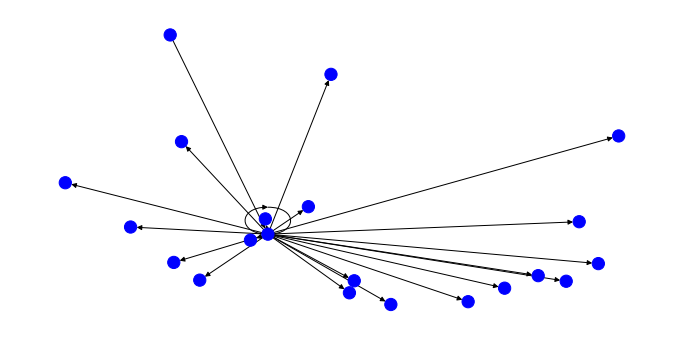

In [60]:
pos = nx.random_layout(G)
color_map = {'nft': 'red', 'wallet': 'blue'}
plt.figure(figsize=(12, 6))
nx.draw_networkx(G, \
                 pos, \
                 node_size = 150, \
                 node_color=[color_map[node[1]['node_type']] for node in G.nodes(data=True)], \
                 alpha = 1, \
                 with_labels=False)
plt.axis('off')
plt.savefig('Whale_bipartide_wallet_to_wallet.png')

In [460]:
G.degree

DiDegreeView({'': 1, '0x8acc1421ec98689461ff5777de8ad6648dc6d643': 22, '0x87b77fabfeb869150b8e1b9462603f9a639c5fae': 1, '0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c': 1, '0xbabda06088c242fb2a763aa7cc99706cb77ba735': 1, '0x7316e9cf94bef40d4981d66a5c41c38b6b32454c': 1, '0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04': 1, '0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0': 1, '0xf5aee6d7b838d5ede8aa65d31dbc11116545180c': 1, '0x463215edb66fb6a8f0c979e739a731977617699f': 1, '0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62': 1, '0x6a47b60c377450a460d3eb828d534ee66eead668': 1, '0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee': 1, '0xa21e0974137bf8400eb7dca606d9dcb190d79ed9': 1, '0x236ef21dc36d0aec3990dd5ee84a9d5320644262': 1, '0xe738725cdcc41c91f734dd7b5b9659df994d6dda': 1, '0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8': 1, '0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8': 1, '0x1c1ef71445010114f41ac1feb32dbf5d7281e90f': 1, '0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a': 1, '0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28': 1

##### HIS BROTHERS AND SISTERS?

0x8acc1421ec98689461ff5777de8ad6648dc6d643
{'avg': 2.2519553917404505, 'count': 617, 'total_profit': 1389.456476703858}

0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8
{'avg': 2.19609054383117, 'count': 616, 'total_profit': 1352.7917750000008}

0xa21e0974137bf8400eb7dca606d9dcb190d79ed9
{'avg': 2.3006426628664522, 'count': 614, 'total_profit': 1412.5945950000016}

0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee
{'avg': 2.3572472385620915, 'count': 612, 'total_profit': 1442.6353100000001}

0x1c1ef71445010114f41ac1feb32dbf5d7281e90f
{'avg': 2.3474603371710523, 'count': 608, 'total_profit': 1427.2558849999998}

0x6a47b60c377450a460d3eb828d534ee66eead668
{'avg': 2.2968711341059636, 'count': 604, 'total_profit': 1387.310165000002}

0xe738725cdcc41c91f734dd7b5b9659df994d6dda
{'avg': 2.2413728476821193, 'count': 604, 'total_profit': 1353.7892000000002}

0x463215edb66fb6a8f0c979e739a731977617699f
{'avg': 2.170596011705686, 'count': 598, 'total_profit': 1298.0164150000003}

0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8
{'avg': 2.2783097403685093, 'count': 597, 'total_profit': 1360.1509150000002}

0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c
{'avg': 2.2265507202680044, 'count': 597, 'total_profit': 1329.2507799999985}

0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28
{'avg': 2.260721519524621, 'count': 589, 'total_profit': 1331.5649750000016}

0x236ef21dc36d0aec3990dd5ee84a9d5320644262
{'avg': 2.3027468534482822, 'count': 580, 'total_profit': 1335.5931750000036}

0xf5aee6d7b838d5ede8aa65d31dbc11116545180c
{'avg': 2.279057060869569, 'count': 575, 'total_profit': 1310.4578100000022}

0xbabda06088c242fb2a763aa7cc99706cb77ba735
{'avg': 2.312860959860382, 'count': 573, 'total_profit': 1325.269329999999}

0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a
{'avg': 2.1250271578947357, 'count': 570, 'total_profit': 1211.2654799999993}

0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04
{'avg': 2.152705511463846, 'count': 567, 'total_profit': 1220.5840250000008}

0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0
{'avg': 2.305673079710144, 'count': 552, 'total_profit': 1272.7315399999993}

0x7316e9cf94bef40d4981d66a5c41c38b6b32454c
{'avg': 2.2200820802919665, 'count': 548, 'total_profit': 1216.6049799999976}

0x87b77fabfeb869150b8e1b9462603f9a639c5fae
{'avg': 2.2851332674199623, 'count': 531, 'total_profit': 1213.405765}

0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62
{'avg': 2.2776891950757587, 'count': 528, 'total_profit': 1202.6198950000005}

In [61]:
import random

bro_and_sis = [
'0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8',
'0xa21e0974137bf8400eb7dca606d9dcb190d79ed9',
'0x838c14eb3eabe4cb6a696d286c7b2a466629d0ee',
'0x1c1ef71445010114f41ac1feb32dbf5d7281e90f',
'0x6a47b60c377450a460d3eb828d534ee66eead668',
'0xe738725cdcc41c91f734dd7b5b9659df994d6dda',
'0x463215edb66fb6a8f0c979e739a731977617699f',
'0x179d698f5a1c84c3ff4c5eb04e553c15a0c1d8d8',
'0x1e7f320cf5a938465d501f6bd6c405feb3a70f6c',
'0x6e13c7e25c2cda6f5c8c4e431bee480bfb312c28',
'0x236ef21dc36d0aec3990dd5ee84a9d5320644262',
'0xf5aee6d7b838d5ede8aa65d31dbc11116545180c',
'0xbabda06088c242fb2a763aa7cc99706cb77ba735',
'0x68d31cb3825e559b1e5c0665f2d65d06a17fce1a',
'0xa37e6b46fa8e1a6f1ddbf035c4e0230b8414ff04',
'0xcdcadf0279ee021a0c40a31ac10fa69e028e21d0',
'0x7316e9cf94bef40d4981d66a5c41c38b6b32454c',
'0x87b77fabfeb869150b8e1b9462603f9a639c5fae',
'0xadd12bd6375dc21d579cc4abcfa04864d6ac9a62']

print(len(bro_and_sis))

others_sibs = {}
for sibling in bro_and_sis:
    others_sibs[sibling] = []
    for trade in data:
        if '_Rari' in trade['row'][0] or trade['row'][3] <= 2:
            continue
        if trade['row'][4]['buyer'] == sibling:
            others_sibs[sibling].append(trade)
    print(sibling)
    rand = random.choice(range(0,len(others_sibs[sibling])))
    pretty_cycle(others_sibs[sibling][rand]['row'][4]['cycle']['sales'])
    print()

19
0x00c9da65b33b4f7034b5f50b90f5f6d8320d6ab8
   T(d) 0.0m/0.0h/0.00d, B: 0x00.. $30.9591(0.0) 0x50e0b3e4a092a94c962a9d54d39762690b8b2521d251740eb8e3e1cb8d1041de
->T(d) 240.2m/4.0h/0.17d, B: 0xad.. $31.2507(0.29159999999999897) 0x42065515d455998c43c2beceb083758f24c6df4793cd16365538071ea3cc09aa
->T(d) 235.3m/3.9h/0.16d, B: 0x00.. $31.2507(0.29159999999999897) 0x13110bfd1f1730b6e81fa8e136332fd7266911b121ab5837ae6ed8b54aff66be

0xa21e0974137bf8400eb7dca606d9dcb190d79ed9
   T(d) 0.0m/0.0h/0.00d, B: 0xa2.. $20.4022(0.0) 0x8c8d50a11fecba7cabe85c9758f3e66a40ba26e4f13e36c42330e951c3fd2302
->T(d) 238.7m/4.0h/0.17d, B: 0xf5.. $20.4022(0.0) 0x018b7022be5c5f2a31b4a00c96a83b52a64318478211f9e387b2016c0a7e0d51
->T(d) 236.9m/3.9h/0.16d, B: 0x00.. $20.4022(0.0) 0xa8f94a8d5543679f60b28dda00b39700c87df4a3a71de7afde1cd65d7e1058cb
->T(d) 233.7m/3.9h/0.16d, B: 0x6e.. $20.640200000000004(0.2380000000000031) 0x41c725a89a04ed6d7e3769bc930fe75144647d35938cea7779fc31c4d0dff2b6
->T(d) 247.8m/4.1h/0.17d, B: 0x83..

### Traders that made the most profits in total

In [62]:
traders = {}
for x in data:
    buyer = x['row'][4]['buyer']
    if buyer not in traders:
        traders[buyer] = 0
    traders[buyer] += x['row'][4]['profit_usd']
dict(sorted(traders.items(), key=lambda item: item[1], reverse=True))

{'0x879c2ee5adc372d0542d65d80ebfe647ac1a5f10': 99141.5205,
 '0x597b4719d1e6692913ebfd29f8f59ba8f5cc4bd3': 68180.9625,
 '0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea': 64137.793499999985,
 '0xeca5ac6bad45c1128981d5a78baafec3a1e471d9': 62612.55990000001,
 '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd': 49936.399999999994,
 '0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac': 42553.01239,
 '0x4a17fd7aa0d240599cf13d670dbde7e124adcfff': 29064.630999999998,
 '0xb1adceddb2941033a090dd166a462fe1c2029484': 27478.108250000005,
 '0x7a37a180b143bf8b9b3875c0dcdbc6bca5b0050f': 26451.2,
 '0x871dfdea4a2f426624f24310dfd93ffae93c6522': 25439.746660400007,
 '0x7397f163f6ef1d5ea97256e9bc081fd89353c3a2': 24035.227999999996,
 '0xf8283d5f9ea151dd6710f7558de94d6cfba6198d': 20840.89095,
 '0xef467a7a5061900eef3952c9562163bda9944954': 18637.2803,
 '0xd30874ca82901d41fe66ded3012909d81924a0b8': 17173.352,
 '0xb30a35bb3b3830626c97f0ea9b123a3d9439c468': 15739.812,
 '0x339df4db958e19ad3b642baad7ad7f7dc3900ed5': 15224.2596,
 '0x

In [63]:
{ '0x879c2ee5adc372d0542d65d80ebfe647ac1a5f10': "..",
  '0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea': "metadoge.eth",
  '0xe72eb31b59f85b19499a0f3b3260011894fa0d65': "heeee.eth",
  '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd': "..",
  '0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac': "..",
 '0x59a5493513ba2378ed57ae5ecfb8a027e9d80365': " Sybil Delegate: iamDCinvestor ",
 '0x4a17fd7aa0d240599cf13d670dbde7e124adcfff': "..",
 '0xb1adceddb2941033a090dd166a462fe1c2029484': '0x_b1',
 '0x7a37a180b143bf8b9b3875c0dcdbc6bca5b0050f': '..',
 '0x7397f163f6ef1d5ea97256e9bc081fd89353c3a2': '..',
}

{'0x879c2ee5adc372d0542d65d80ebfe647ac1a5f10': '..',
 '0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea': 'metadoge.eth',
 '0xe72eb31b59f85b19499a0f3b3260011894fa0d65': 'heeee.eth',
 '0xb166dd9d114c59774a13c3291e7d50ec74f23dfd': '..',
 '0x0a2542a170aa02b96b588aa3af8b09ab22a9d7ac': '..',
 '0x59a5493513ba2378ed57ae5ecfb8a027e9d80365': ' Sybil Delegate: iamDCinvestor ',
 '0x4a17fd7aa0d240599cf13d670dbde7e124adcfff': '..',
 '0xb1adceddb2941033a090dd166a462fe1c2029484': '0x_b1',
 '0x7a37a180b143bf8b9b3875c0dcdbc6bca5b0050f': '..',
 '0x7397f163f6ef1d5ea97256e9bc081fd89353c3a2': '..'}

### Traders that made the most profits per cycle on average

In [64]:
traders = {}
for x in data:
    buyer = x['row'][4]['buyer']
    if buyer not in traders:
        traders[buyer] = {'profit_usd': 0, 'counter':0, 'cycles':[]}
    traders[buyer]['profit_usd'] += x['row'][4]['profit_usd']
    traders[buyer]['counter']+=1
    traders[buyer]['cycles'].append(x['row'][4]['cycle'])
for t in traders.keys():
    traders[t]['average']= traders[t]['profit_usd']/traders[t]['counter']

sorted_traders_average = dict(sorted(traders.items(), key=lambda item: item[1]['average'], reverse=True))
i=0
for k,v in sorted_traders_average.items():
    i+=1
    if i > 10:
        break
    for sale in v['cycles']:
        print("Trader (%s), %i Trades, %i Trades, Profit %.3f" % (k, v['counter'], len(sale['sales']), v['profit_usd'] ) )
            

Trader (0xb166dd9d114c59774a13c3291e7d50ec74f23dfd), 1 Trades, 3 Trades, Profit 49936.400
Trader (0x597b4719d1e6692913ebfd29f8f59ba8f5cc4bd3), 2 Trades, 11 Trades, Profit 68180.962
Trader (0x597b4719d1e6692913ebfd29f8f59ba8f5cc4bd3), 2 Trades, 3 Trades, Profit 68180.962
Trader (0x4a17fd7aa0d240599cf13d670dbde7e124adcfff), 1 Trades, 2 Trades, Profit 29064.631
Trader (0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea), 3 Trades, 49 Trades, Profit 64137.793
Trader (0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea), 3 Trades, 7 Trades, Profit 64137.793
Trader (0x93207b8c861cf2b96a92c41d99da0e9615f1a3ea), 3 Trades, 27 Trades, Profit 64137.793
Trader (0xeca5ac6bad45c1128981d5a78baafec3a1e471d9), 3 Trades, 4 Trades, Profit 62612.560
Trader (0xeca5ac6bad45c1128981d5a78baafec3a1e471d9), 3 Trades, 47 Trades, Profit 62612.560
Trader (0xeca5ac6bad45c1128981d5a78baafec3a1e471d9), 3 Trades, 7 Trades, Profit 62612.560
Trader (0xf8283d5f9ea151dd6710f7558de94d6cfba6198d), 1 Trades, 2 Trades, Profit 20840.891
Trader

In [65]:
sorted_traders_average['0xeca5ac6bad45c1128981d5a78baafec3a1e471d9']

{'profit_usd': 62612.55990000001,
 'counter': 3,
 'cycles': [{'sales': [{'buyer': '0xeca5ac6bad45c1128981d5a78baafec3a1e471d9',
     'price_usd': 8408.169,
     'time': 1599708715,
     'tx_hash': '0x2520df2030b45f83b1f1471bbe435d4606516e76190ca8660d8feb54f6b7d8fa',
     'nft_id': '6929_Rari'},
    {'buyer': '0x71ed1ed34474469f09622377801da0a35363d2d7',
     'price_usd': 1081.0503,
     'time': 1599711485,
     'tx_hash': '0xb17351128f73c85d44273bcabdb09b572ea2c067782ace22a4c0e20a844e6b18',
     'nft_id': '6929_Rari'},
    {'buyer': '0x05913a70848be8964523a029b834d324a737c17a',
     'price_usd': 9008.7525,
     'time': 1599711703,
     'tx_hash': '0xd55505fe478ea3a2b16c9fa6e2203b98334901da0302da954890cc16757ad119',
     'nft_id': '6929_Rari'},
    {'buyer': '0xeca5ac6bad45c1128981d5a78baafec3a1e471d9',
     'price_usd': 54412.8651,
     'time': 1599713789,
     'tx_hash': '0x82db2f0eed444598ce26f1516f5c3762c656d82023fa38d7aef478b54dde0a00',
     'nft_id': '6929_Rari'}]},
  {'sales': [{

In [ ]:
sorted_traders_average['0xeca5ac6bad45c1128981d5a78baafec3a1e471d9']['cycles'][0]

In [ ]:
sorted_traders_average['0xeca5ac6bad45c1128981d5a78baafec3a1e471d9']['cycles'][1]

### NFT that had been cycled the most?

In [ ]:
'CycleData(0xe748f643b9b5debe0a025e118512be787e5a1ea8'[10:]